# Прогнозирование ухода клиентов из банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Неободимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**
* Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
df.rename(columns=str.lower,inplace=True)
df.columns=['number', 'customer_id', 'surname', 'credit_score', 'country',
       'gender', 'age', 'years_of_loyalty', 'balance($)', 'num_of_products', 'has_crcard',
       'is_activemember', 'estimated_salary', 'exited']
df.sample(5).T

,9124,864,8132,3220,1787
number,9125,865,8133,3221,1788
customer_id,15753639,15805449,15607485,15674331,15753549
surname,Gibson,Ugochukwu,Wakelin,Bidwill,Dubinina
credit_score,608,594,692,576,669
country,France,France,Spain,Germany,France
gender,Male,Male,Female,Male,Male
age,37,38,29,30,25
years_of_loyalty,5.0,4.0,4.0,7.0,NaN
balance($),146093.39,0.0,0.0,132174.41,157848.53
num_of_products,2,2,2,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   country           10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   years_of_loyalty  9091 non-null   float64
 8   balance($)        10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  is_activemember   10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# заменяем контрастным значением пропуски в столбце years_of_loyalty    
df=df.fillna(-1)
df.isna().sum()

number              0
customer_id         0
surname             0
credit_score        0
country             0
gender              0
age                 0
years_of_loyalty    0
balance($)          0
num_of_products     0
has_crcard          0
is_activemember     0
estimated_salary    0
exited              0
dtype: int64

In [ ]:
df.dtypes

number                int64
customer_id           int64
surname              object
credit_score          int64
country              object
gender               object
age                   int64
years_of_loyalty    float64
balance($)          float64
num_of_products       int64
has_crcard            int64
is_activemember       int64
estimated_salary    float64
exited                int64
dtype: object

In [ ]:
# изменяем тип переменных в столбце years_of_loyalty на строки, 
# чтобы в дальнейшем применяя one hot encoding убрать эти значения
df['years_of_loyalty']=df['years_of_loyalty'].astype('object')
df.dtypes

number                int64
customer_id           int64
surname              object
credit_score          int64
country              object
gender               object
age                   int64
years_of_loyalty     object
balance($)          float64
num_of_products       int64
has_crcard            int64
is_activemember       int64
estimated_salary    float64
exited                int64
dtype: object

In [ ]:
features = df[['credit_score', 'country','gender', 'age', 'years_of_loyalty',
              'balance($)', 'num_of_products', 'has_crcard',
             'is_activemember', 'estimated_salary']]
target = df['exited']

In [ ]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
balance($),10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
num_of_products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
has_crcard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
is_activemember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [ ]:
target.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
exited,10000.0,0.2037,0.402769,0.0,0.0,0.0,0.0,1.0


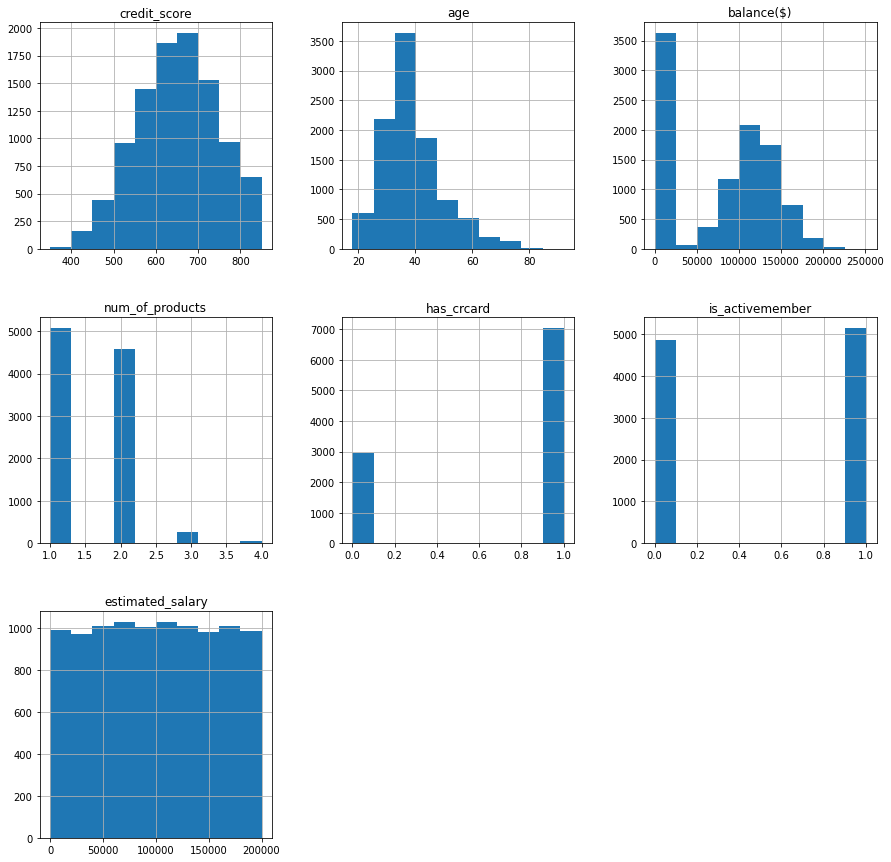

In [ ]:
features.hist(figsize=(15, 15));

In [ ]:
df['exited'].value_counts(normalize=True).to_frame()

,exited
0,0.7963
1,0.2037


Соотношение факта ухода клиента примерно 8 к 2

In [ ]:
# применяем one hot encoding 
features= pd.get_dummies(features, drop_first=True)
features

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,credit_score,age,balance($),num_of_products,has_crcard,is_activemember,estimated_salary,country_Germany,country_Spain,gender_Male,...,years_of_loyalty_1.0,years_of_loyalty_2.0,years_of_loyalty_3.0,years_of_loyalty_4.0,years_of_loyalty_5.0,years_of_loyalty_6.0,years_of_loyalty_7.0,years_of_loyalty_8.0,years_of_loyalty_9.0,years_of_loyalty_10.0
0,619,42,0.00,1,1,1,101348.88,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,1,0,96270.64,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9996,516,35,57369.61,1,1,1,101699.77,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9997,709,36,0.00,1,0,1,42085.58,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,772,42,75075.31,2,1,0,92888.52,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
features_train, features_other, target_train, target_other = train_test_split(
    features, target, stratify=target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_other, target_other, stratify=target_other, test_size=0.5, random_state=12345)

In [ ]:
# Масштабируем численные значения
pd.options.mode.chained_assignment = None  

numeric = ['credit_score', 'age', 'balance($)',
       'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
features_train[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,6000.0,5.844214e-16,1.000083,-3.091423,-0.690014,0.010827,0.691055,2.061816
age,6000.0,-6.987004e-17,1.000083,-2.001708,-0.667183,-0.190567,0.476696,5.052210
balance($),6000.0,1.427007e-16,1.000083,-1.219673,-1.219673,0.335288,0.825286,2.588919
num_of_products,6000.0,1.338189e-16,1.000083,-0.914708,-0.914708,-0.914708,0.820981,4.292357
estimated_salary,6000.0,-7.993606e-17,1.000083,-1.743588,-0.861205,-0.000343,0.865970,1.730631


In [ ]:
# деление данных на выборки без масштабирования
rng = np.random.RandomState(12345)
features_train2, features_other2, target_train2, target_other2 = train_test_split(
    features, target, stratify=target, test_size=0.4, random_state=rng)
features_test2, features_valid2, target_test2, target_valid2 = train_test_split(
    features_other2, target_other2, stratify=target_other, test_size=0.5, random_state=rng)

**Вывод**

- Были исключены из анализа столбцы с номером строки, номером ID, фамилией клиента('number', 'customer_id', 'surname'), так как не играют роли в решении об уходе из банка
- Пропуски в столбце years_of_loyalty (Tenure) - количество лет работы клиента с банком - было решено заменить контрастным значением, чтобы применяя one hot encoding убрать и исключить из анализа, странно, чо такие пропуски имеются в данных, так как банк всегда имеет всю информацию о клиентах, особенно о том, когда клиенты оформили договор с банком.
- Применен метод one hot encoding (OHE) для кодирования категориальных признаков (применен только для столбца Country и years_of_loyalty) 
- Данные поделены на тренировочную, валидационную и тестовую выборки (60/20/20)
- Сделано масштабирование численных признаков - столбцы 'credit_score', 'age', 'balance($)',    'num_of_products', 'estimated_salary'.

Данные предобработаны, закодированы, масштабированы и поделены на выборки. Теперь можно обучать ML модель и исследовать задачу.

## Исследование задачи

### Логистическая регрессия

In [ ]:
# исследование на масштабированных данных с использованием class_weight='balanced'
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
predicted_train = model.predict(features_train)

accuracy_val=accuracy_score(target_valid, predicted_valid).round(4)
accuracy_train=accuracy_score(target_train, predicted_train).round(4)
f1_lg = f1_score(target_valid,predicted_valid).round(4)
print("Accuracy модели логистической регрессии на тестовой выборке:", accuracy_train)
print("Accuracy модели логистической регрессии на валидационной выборке:", accuracy_val)
print("F1_score модели логистической регрессии на валидационной выборке:", f1_lg)


Accuracy модели логистической регрессии на тестовой выборке: 0.709
Accuracy модели логистической регрессии на валидационной выборке: 0.699
F1_score модели логистической регрессии на валидационной выборке: 0.4765


In [ ]:
# исследование на не масштабированных данных
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train2,target_train2)
predicted_valid2 = model.predict(features_valid2)
predicted_train2 = model.predict(features_train2)

accuracy_val2=accuracy_score(target_valid2, predicted_valid2).round(4)
accuracy_train2=accuracy_score(target_train2, predicted_train2).round(4)
f1_lg2 = f1_score(target_valid2,predicted_valid2).round(4)
print("Accuracy модели логистической регрессии на тестовой выборке:", accuracy_train2)
print("Accuracy модели логистической регрессии на валидационной выборке:", accuracy_val2)
print("F1_score модели логистической регрессии на валидационной выборке:", f1_lg2)


Accuracy модели логистической регрессии на тестовой выборке: 0.6515
Accuracy модели логистической регрессии на валидационной выборке: 0.66
F1_score модели логистической регрессии на валидационной выборке: 0.4516


In [ ]:
# исследование на масштабированных данных без class_weight='balanced' - показатели оказались выше, кроме f1, это не хорошо
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
predicted_train = model.predict(features_train)

accuracy_val=accuracy_score(target_valid, predicted_valid).round(4)
accuracy_train=accuracy_score(target_train, predicted_train).round(4)
f1_lg = f1_score(target_valid,predicted_valid).round(4)
print("Accuracy модели логистической регрессии на тестовой выборке:", accuracy_train)
print("Accuracy модели логистической регрессии на валидационной выборке:", accuracy_val)
print("F1_score модели логистической регрессии на валидационной выборке:", f1_lg)

Accuracy модели логистической регрессии на тестовой выборке: 0.8133
Accuracy модели логистической регрессии на валидационной выборке: 0.8115
F1_score модели логистической регрессии на валидационной выборке: 0.2846


Точность модели при константном значении предсказания выше, чем точность обученной модели Логистической регрессией. 

In [ ]:
# константная модель 
pred_median = (np.zeros(target_valid.value_counts().sum())).astype('int')
accuracy_const = accuracy_score(target_valid, pred_median).round(4)
f1_const = f1_score(target_valid, pred_median)
print("Accuracy модели на валидационной выборке c константным значением target = 0:", accuracy_const)
print("F1 модели на валидационной выборке c константным значением target = 0:", f1_const)
print('Confusion_matrix для константной модели:')
print(confusion_matrix(target_valid, pred_median))

Accuracy модели на валидационной выборке c константным значением target = 0: 0.7965
F1 модели на валидационной выборке c константным значением target = 0: 0.0
Confusion_matrix для константной модели:
[[1593    0]
 [ 407    0]]


In [ ]:
f1=((2*1593)/(2*1593+407+0))
print('f1 = ', f1)

f1 =  0.8867241859170609


### Случайный лес

In [ ]:
%%time

# Рассчет наиболее оптимальнх параметров для модели случайного леса
# перебор параметров + criterion + class_weight

best_model = 0
best_result = 0
best_depth = 0
best_est = 0
best_f1_rf=0
best_wei=0
best_cri=0
crit = ['entropy','gini']
weight = ['balanced',None]
list_of_accurancy3=[]
list_of_est2=[]
list_of_f11=[]
list_of_depth2=[]
for depth in range(1,20):
    for est in range(1,100,5):
        for cri in crit:
            for wei in weight:
                model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, 
                                              criterion=cri, class_weight=wei) 
                model.fit(features_train,target_train) 
                result1 = model.score(features_valid,target_valid)
                predicted_valid=model.predict(features_valid)
                f1_rf1 = f1_score(target_valid,predicted_valid).round(4)
                list_of_f11.append(f1_rf1)
                list_of_accurancy3.append(result1)
                list_of_est2.append(est)
                list_of_depth2.append(depth)
                if f1_rf1 > best_f1_rf:
                    best_model = model
                    best_result = result1
                    best_depth = depth
                    best_est = est
                    best_f1_rf=f1_rf1
                    best_cri=cri
                    best_wei=wei
            
print("Accuracy наилучшей модели (при f1 max) на валидационной выборке:", best_result.round(4))
print("F1_score наилучшей модели на валидационной выборке:", best_f1_rf)
print("Глубина дерева:", best_depth)
print("Количество деревьев:", best_est)
print("Criterion:", best_cri)
print("class_weight:", best_wei)

Accuracy наилучшей модели (при f1 max) на валидационной выборке: 0.831
F1_score наилучшей модели на валидационной выборке: 0.6185
Глубина дерева: 8
Количество деревьев: 71
Criterion: gini
class_weight: balanced
CPU times: user 10min 7s, sys: 2.24 s, total: 10min 9s
Wall time: 10min 42s


In [ ]:
%%time

# Рассчет наиболее оптимальнх параметров для модели случайного леса для немасштабированных выборок
# перебор параметров + criterion + class_weight

best_model2 = 0
best_result2 = 0
best_depth2 = 0
best_est2 = 0
best_f1_rf2=0
best_wei2=0
best_cri2=0
crit2 = ['entropy','gini']
weight2 = ['balanced',None]
for depth2 in range(1,20):
    for est2 in range(1,100,5):
        for cri2 in crit2:
            for wei2 in weight2:
                model2 = RandomForestClassifier(random_state=12345, n_estimators=est2, max_depth=depth2, 
                                              criterion=cri2, class_weight=wei2) 
                model2.fit(features_train2,target_train2) 
                result12 = model2.score(features_valid2,target_valid2)
                predicted_valid2=model2.predict(features_valid2)
                f1_rf12 = f1_score(target_valid2,predicted_valid2).round(4)
                if f1_rf12 > best_f1_rf2:
                    best_model2 = model2
                    best_result2 = result12
                    best_depth2 = depth2
                    best_est2 = est2
                    best_f1_rf2=f1_rf12
                    best_cri2=cri2
                    best_wei2=wei2
            
print("Accuracy наилучшей модели (при f1 max) на валидационной выборке:", best_result2.round(4))
print("F1_score наилучшей модели на валидационной выборке:", best_f1_rf2)
print("Глубина дерева:", best_depth2)
print("Количество деревьев:", best_est2)
print("Criterion:", best_cri2)
print("class_weight:", best_wei2)

Accuracy наилучшей модели (при f1 max) на валидационной выборке: 0.8465
F1_score наилучшей модели на валидационной выборке: 0.6539
Глубина дерева: 9
Количество деревьев: 91
Criterion: entropy
class_weight: balanced
CPU times: user 9min 55s, sys: 2.06 s, total: 9min 57s
Wall time: 10min 3s


In [ ]:
forest_table=pd.DataFrame({'f1_score (%)':[47.65,48.19,62.04,65.56],'accuracy(%)':[69.9,69.25,83.05,85.45],
                           'est':['-','-',46,36], 'depth':['-','-',8,11],'criterion':['-','-','entropy','gini']},
                        index=['LogisticRegression.Масштабированные выборки','LogisticRegression.Не масштабированные выборки',
                                  'RandomForestClassifier.Масштабированные выборки',
                               'RandomForestClassifier.Не масштабированные выборки'])
forest_table

,f1_score (%),accuracy(%),est,depth,criterion
LogisticRegression.Масштабированные выборки,47.65,69.90,-,-,-
LogisticRegression.Не масштабированные выборки,48.19,69.25,-,-,-
RandomForestClassifier.Масштабированные выборки,62.04,83.05,46,8,entropy
RandomForestClassifier.Не масштабированные выборки,65.56,85.45,36,11,gini


In [ ]:
# деление выборки для GridSearchCV (80/20)
features_train_gs, features_test_gs, target_train_gs, target_test_gs = train_test_split(
    features, target, stratify=target, test_size=0.8, random_state=12345)
# деление выборки для GridSearchCV (80/20) - для масштабирования
features_train_gs1, features_test_gs1, target_train_gs1, target_test_gs1 = train_test_split(
    features, target, stratify=target, test_size=0.8, random_state=12345)

In [ ]:
%%time
# применение GridSearchCV на немасштабированных выборках
parametrs = { 'n_estimators': range (1, 100, 5),
              'max_depth': range (1,20),
              'criterion' : ['gini', 'entropy'],
            'class_weight':['balanced', None]}
model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(model, parametrs,cv= 5)
grid.fit(features_train_gs,target_train_gs)

CPU times: user 20min 54s, sys: 6.24 s, total: 21min
Wall time: 21min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'n_estimators': range(1, 100, 5)})

In [ ]:
grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'n_estimators': 76}

In [ ]:
# проверка значения точности и f1 для модели по критериям GridSearchCV
model = RandomForestClassifier(random_state=12345, n_estimators=76, max_depth=12, criterion="gini") 
model.fit(features_train_gs,target_train_gs)
predictions_test=model.predict(features_test_gs)
print('Точность модели с критерием gini:',accuracy_score(target_test_gs, predictions_test).round(4))
print('F1 модели с критерием gini:',f1_score(target_test_gs, predictions_test).round(4))

Точность модели с критерием gini: 0.8595
F1 модели с критерием gini: 0.5416


In [ ]:
# масштабирование
scaler = StandardScaler()
scaler.fit(features_train_gs1[numeric])
features_train_gs1[numeric] = scaler.transform(features_train_gs1[numeric])
features_test_gs1[numeric] = scaler.transform(features_test_gs1[numeric])

In [ ]:
%%time
# применение GridSearchCV на масштабированных выборках
parametrs = { 'n_estimators': range (1, 100, 5),
              'max_depth': range (1,20),
              'criterion' : ['gini', 'entropy'],
            'class_weight':['balanced', None]}
model2 = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(model2, parametrs,cv= 5)
grid.fit(features_train_gs1,target_train_gs1)

CPU times: user 21min, sys: 6.32 s, total: 21min 6s
Wall time: 21min 32s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'n_estimators': range(1, 100, 5)})

In [ ]:
grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'n_estimators': 76}

In [ ]:
# проверка значения точности и f1 для модели по критериям GridSearchCV - по масштабированным выборкам
model = RandomForestClassifier(random_state=12345, n_estimators=76, max_depth=12, criterion="gini") 
model.fit(features_train_gs1,target_train_gs1)
predictions_test1=model.predict(features_test_gs1)
print('Точность модели с критерием gini:',accuracy_score(target_test_gs1, predictions_test1).round(4))
print('F1 модели с критерием gini:',f1_score(target_test_gs1, predictions_test1).round(4))

Точность модели с критерием gini: 0.8596
F1 модели с критерием gini: 0.5426


In [ ]:
# вычисление параметра auc_roc на лучшей модели 
model = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, 
                                       criterion="gini") 
model.fit(features_train2,target_train2) 

probabilities_valid = model.predict_proba(features_valid2)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(target_valid2,probabilities_one_valid)

print("AUC-ROC =",auc_roc.round(4))



AUC-ROC = 0.8626


**Вывод**

   Были использованы различные методы машинного обучения и подобраны наиболее оптимальные параметры для тренировки модели.
   
   Наивысшее значение точности и F1 для изученных моделей: **Точность 85.45%, f1_score 65.56% - модель случайного леса с количеством деревьев - 36, глубина деревьев - 11, использован критерий 'gini', обучение на немасштабированных данных** Модель отличается от случайной - AUC-ROC = 0.8626
   
   Точность модели на валидационной выборке c константным значением **target = '0': 79.6%** - Выбранная модель случайного леса прошла тест на адекватность (ее значение точности выше). Таким, образом ее можно брать для дальнейшего анализа. 

## Борьба с дисбалансом

In [ ]:
df['exited'].value_counts(normalize=True).to_frame()

,exited
0,0.7963
1,0.2037


Как было выявлено ранее соотношение значений факта ухода клиента примерно 8 к 2. Необходимо устранить дисбаланс.

### upsample/downsample

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled1 = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled1 = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled1,target_upsampled1=shuffle(features_upsampled1,target_upsampled1,random_state=12345)
    return features_upsampled1, target_upsampled1 

features_upsampled1, target_upsampled1 = upsample(features_train2, target_train2,5)


In [ ]:
target_upsampled1.value_counts(normalize=True).to_frame()

,exited
1,0.561168
0,0.438832


In [ ]:
features_upsampled1.shape

(10888, 21)

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled= pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])  
    features_downsampled,target_downsampled=shuffle(features_downsampled,target_downsampled,random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train2, target_train2, 0.2)



In [ ]:
target_downsampled.value_counts(normalize=True).to_frame()

,exited
1,0.561065
0,0.438935


In [ ]:
features_downsampled.shape

(2178, 21)

In [ ]:
%%time
# пробуем потренировать модель с upsampled значениями
best_model2 = 0
best_result2 = 0
best_depth2 = 0
best_est2 = 0
best_f1_rf2=0
best_wei2=0
best_cri2=0
crit2 = ['entropy','gini']
for depth2 in range(1,20):
    for est2 in range(1,100,5):
        for cri2 in crit2:
            
            model2 = RandomForestClassifier(random_state=12345, n_estimators=est2, max_depth=depth2, 
                                              criterion=cri2) 
            model2.fit(features_upsampled1,target_upsampled1) 
            result12 = model2.score(features_valid2,target_valid2)
            predicted_valid2=model2.predict(features_valid2)
            f1_rf12 = f1_score(target_valid2,predicted_valid2).round(4)
            if f1_rf12 > best_f1_rf2:
                best_model2 = model2
                best_result2 = result12
                best_depth2 = depth2
                best_est2 = est2
                best_f1_rf2=f1_rf12
                best_cri2=cri2
                best_wei2=wei2
            
print("Accuracy наилучшей модели (при f1 max) на валидационной выборке:", best_result2.round(4))
print("F1_score наилучшей модели на валидационной выборке:", best_f1_rf2)
print("Глубина дерева:", best_depth2)
print("Количество деревьев:", best_est2)
print("Criterion:", best_cri2)

KeyboardInterrupt: ignored

### Изменение порога

In [ ]:
model3 = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, 
                                       criterion="gini") 
model3.fit(features_train2,target_train2) 

probabilities_valid = model3.predict_proba(features_valid2)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.3, 0.31, 0.001):
    predicted_valid2 = probabilities_one_valid > threshold 
    precision = precision_score(target_valid2,predicted_valid2) 
    recall = recall_score(target_valid2,predicted_valid2) 
    f1 = f1_score(target_valid2, predicted_valid2)
    accuracy = accuracy_score(target_valid2, predicted_valid2) 
    print("Порог = {:.3f} | precision = {:.3f}, recall = {:.3f},  f1 = {:.3f},  accuracy = {:.3f}".format(
        threshold, precision, recall,f1,accuracy))


Порог = 0.300 | precision = 0.611, recall = 0.627,  f1 = 0.619,  accuracy = 0.843
Порог = 0.301 | precision = 0.612, recall = 0.625,  f1 = 0.618,  accuracy = 0.843
Порог = 0.302 | precision = 0.614, recall = 0.625,  f1 = 0.620,  accuracy = 0.844
Порог = 0.303 | precision = 0.615, recall = 0.623,  f1 = 0.619,  accuracy = 0.844
Порог = 0.304 | precision = 0.617, recall = 0.623,  f1 = 0.620,  accuracy = 0.844
Порог = 0.305 | precision = 0.617, recall = 0.623,  f1 = 0.620,  accuracy = 0.844
Порог = 0.306 | precision = 0.617, recall = 0.620,  f1 = 0.619,  accuracy = 0.844
Порог = 0.307 | precision = 0.617, recall = 0.620,  f1 = 0.619,  accuracy = 0.844
Порог = 0.308 | precision = 0.619, recall = 0.620,  f1 = 0.619,  accuracy = 0.845
Порог = 0.309 | precision = 0.622, recall = 0.618,  f1 = 0.620,  accuracy = 0.846
Порог = 0.310 | precision = 0.624, recall = 0.618,  f1 = 0.621,  accuracy = 0.846


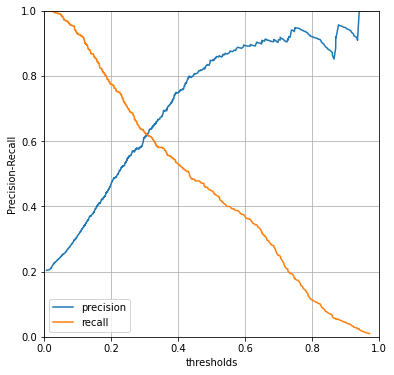

Best threshold = 0.309


In [ ]:
precision, recall, thresholds = precision_recall_curve(target_valid2, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.plot(thresholds, precision[:-1], label='precision')
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
plt.plot(thresholds, recall[:-1],label='recall')
plt.grid()
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

print(f'Best threshold = {np.round(thresholds[np.argmin(np.abs(precision - recall))], 3)}')

**Вывод**

Таким образом, для борьбы с дисбалансом можно использовать upsampling, либо изменение порога на 0.309

Теперь можно приступить к тестированию модели на тестовой выборке

## Тестирование модели

In [ ]:
# объединяем обучающую и валидационные выборки в одну
train_features_large = pd.concat([features_train2, features_valid2])
train_targets_large = pd.concat([target_train2, target_valid2])

In [ ]:
# применяем upsample

features_upsampled, target_upsampled = upsample(train_features_large, train_targets_large,5)
print(target_upsampled.value_counts(normalize=True).to_frame())

     exited
1  0.561295
0  0.438705


In [ ]:
# тестирование на тестовой выборке модели с лучшими гиперпараметрами, обучая на features_upsampled, target_upsampled (80% данных)
model3 = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, criterion="gini") 
model3.fit(features_upsampled,target_upsampled) 

predicted_test2=model3.predict(features_test2)
f1 = f1_score(target_test2, predicted_test2) 
accuracy = accuracy_score(target_test2, predicted_test2)

probabilities_test = model3.predict_proba(features_test2)
probabilities_one_test = probabilities_test[:, 1]

auc_roc=roc_auc_score(target_test2,probabilities_one_test).round(4)
print(" Accuracy = {:.3f}, F1_score = {:.3f}, AUC-ROC = {:.3f}"
      .format(accuracy, f1, auc_roc)
)

 Accuracy = 0.808, F1_score = 0.611, AUC-ROC = 0.854


In [ ]:
# тестирование на тестовой выборке модели с лучшими гиперпараметрами, обучая на train_features_large, train_targets_large (80% данных)
model3 = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, criterion="gini") 
model3.fit(train_features_large,train_targets_large) 

predicted_test2=model3.predict(features_test2)
f1 = f1_score(target_test2, predicted_test2) 
accuracy = accuracy_score(target_test2, predicted_test2)

probabilities_test = model3.predict_proba(features_test2)
probabilities_one_test = probabilities_test[:, 1]

auc_roc=roc_auc_score(target_test2,probabilities_one_test).round(4)
print(" Accuracy = {:.3f}, F1_score = {:.3f}, AUC-ROC = {:.3f}"
      .format(accuracy, f1, auc_roc)
)

 Accuracy = 0.849, F1_score = 0.507, AUC-ROC = 0.855


In [ ]:
# изменение порога на 0.309 и обучение на features_upsampled,target_upsampled

best_accuracy = 0
best_f1_score = 0
best_threshold = 0
threshold = 0.309

model3 = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, criterion="gini") 
model3.fit(features_upsampled,target_upsampled) 
    
probabilities_test = model3.predict_proba(features_test2)
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > threshold 
f1 = f1_score(target_test2, predicted_test2) 
accuracy = accuracy_score(target_test2, predicted_test2)
auc_roc=roc_auc_score(target_test2,probabilities_one_test).round(4)
print("Наилучшие гипермараметры модели: Порог = {:.3f} | Accuracy = {:.3f}, F1_score = {:.3f}, AUC-ROC = {:.3f}"
      .format(threshold, accuracy, f1,auc_roc)
)

Наилучшие гипермараметры модели: Порог = 0.309 | Accuracy = 0.849, F1_score = 0.507, AUC-ROC = 0.854


In [ ]:
# изменение порога на 0.309 и обучение на train_features_large,train_targets_large

best_accuracy = 0
best_f1_score = 0
best_threshold = 0
threshold = 0.309

model3 = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, criterion="gini") 
model3.fit(train_features_large,train_targets_large) 
    
probabilities_test = model3.predict_proba(features_test2)
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > threshold 
f1 = f1_score(target_test2, predicted_test2) 
accuracy = accuracy_score(target_test2, predicted_test2)
auc_roc=roc_auc_score(target_test2,probabilities_one_test).round(4)
print("Наилучшие гипермараметры модели: Порог = {:.3f} | Accuracy = {:.3f}, F1_score = {:.3f}, AUC-ROC = {:.3f}"
      .format(threshold, accuracy, f1,auc_roc)
)

Наилучшие гипермараметры модели: Порог = 0.309 | Accuracy = 0.849, F1_score = 0.507, AUC-ROC = 0.855


In [ ]:
# таблица с выводами
gen_table2 = pd.DataFrame({'Accuracy (%)':[80.8,84.9],'F1_score (%)':[61.1,50.7],'AUC-ROC(%)':[85.4,85.5]},
                         index=['features_upsampled/target_upsampled (80% данных upsampled)',
                                'train_features_large/train_targets_large (80% данных)'])

gen_table1 = pd.DataFrame({'Accuracy (%)':[84.9,84.9],'F1_score (%)':[50.7, 50.7],'AUC-ROC(%)':[85.4, 85.5]},
                         index=['features_upsampled/target_upsampled (80% данных upsampled)',
                               'train_features_large/train_targets_large (80% данных)'])

display(gen_table2)
print ('                                                  Показатели качества модели без изменения порога')
print()
display(gen_table1)
print ('                                                  Показатели качества модели при изменении порога на 0.309')

,Accuracy (%),F1_score (%),AUC-ROC(%)
features_upsampled/target_upsampled (80% данных upsampled),80.8,61.1,85.4
train_features_large/train_targets_large (80% данных),84.9,50.7,85.5


                                                  Показатели качества модели без изменения порога



,Accuracy (%),F1_score (%),AUC-ROC(%)
features_upsampled/target_upsampled (80% данных upsampled),84.9,50.7,85.4
train_features_large/train_targets_large (80% данных),84.9,50.7,85.5


                                                  Показатели качества модели при изменении порога на 0.309


### PR-кривая

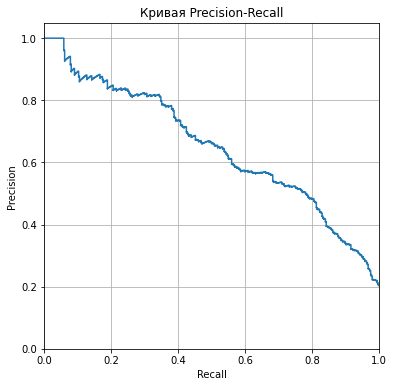

In [ ]:
model3 = RandomForestClassifier(random_state=12345, n_estimators=36, max_depth=11, criterion="gini") 
model3.fit(features_upsampled,target_upsampled) 

probabilities_test = model3.predict_proba(features_test2)
probabilities_one_test = probabilities_test[:, 1]
precision, recall, thresholds = precision_recall_curve(target_test2, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid()
plt.title('Кривая Precision-Recall')
plt.show()


**Модель располагается довольно высоко, что говорит о её хорошем качестве**

### ROC-кривая

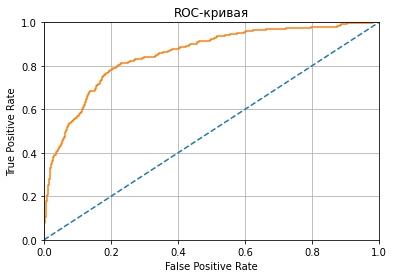

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test2, probabilities_one_test) 
plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая") 
plt.grid()
plt.show()


**Данный график также показывает высокое качество модели и отличие предсказанных значений от случайных. AUC-ROC = 0.873, что довольно близко к 1**

## Вывод

Таким образом, наилучших значений параметров качества модель достигает при обучении на features_upsampled,target_upsampled на 80% данных (тренировочной и валидационных выборках)

Наилучшие значения показателей качества модели:   Accuracy = 0.808, F1_score = 0.611, AUC-ROC = 0.854
